In [86]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal

# !pip install pint
from pint import UnitRegistry
units = UnitRegistry(system = "mks")
units.default_format = "~P.2f"

## EKV Model Implementation for NMOS and PMOS
Model properties (except UT) from [Ian Eykamp's Lab 4 submission](https://www.overleaf.com/project/6244edcbf9a2ee0d05e5d071).

In [87]:
UT = 25.6 * units.mV

def ekv_model_nmos(Vg, Vd, Vs, Vb = 0 * units.V):
    Vgb = Vg - Vb
    Vsb = Vs - Vb
    Vdb = Vd - Vb

    VT0 = 0.6480 * units.V
    Kappa = 0.7051
    Is = 1.640e-6 * units.A
    IF = Is * (np.log(1 + np.exp((Kappa * (Vgb - VT0) - Vsb) / (2 * UT)))) ** 2
    IR = Is * (np.log(1 + np.exp((Kappa * (Vgb - VT0) - Vdb) / (2 * UT)))) ** 2
    I = IF - IR
    return I

def ekv_model_pmos(Vg, Vd, Vs, Vb = 5 * units.V):
    Vbg = Vb - Vg
    Vbs = Vb - Vs
    Vbd = Vb - Vd

    VT0 = 0.7283 * units.V
    Kappa = 0.7609
    Is = 6.108e-7 * units.A
    IF = Is * (np.log(1 + np.exp((Kappa * (Vbg - VT0) - Vbs) / (2 * UT)))) ** 2
    IR = Is * (np.log(1 + np.exp((Kappa * (Vbg - VT0) - Vbd) / (2 * UT)))) ** 2
    I = IF - IR
    return I

## NMOS Examples

Text(0.5, 1.0, 'I vs. Vgs')

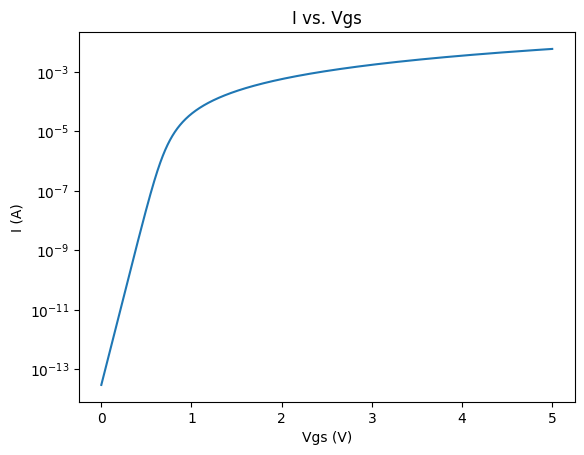

In [88]:
Vb = 0 * units.V
Vg = np.linspace(0 * units.V, 5 * units.V, int(10e3))
Vs = 0 * units.V
Vd = 5 * units.V

I = ekv_model_nmos(Vg, Vd, Vs, Vb)

plt.semilogy(Vg, I)
plt.xlabel("Vgs (V)")
plt.ylabel("I (A)")
plt.title("I vs. Vgs")

Text(0.5, 1.0, 'I vs. Vds')

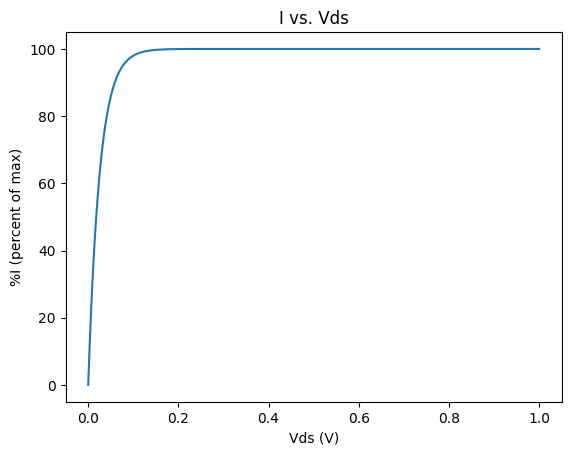

In [89]:
Vb = 0 * units.V
Vg = 0.2 * units.V
Vs = 0 * units.V
Vd = np.linspace(0 * units.V, 1 * units.V, int(10e3))

I = ekv_model_nmos(Vg, Vd, Vs, Vb)
max_I = max(I)
percent_I = I / max_I * 100

plt.plot(Vd, percent_I)
plt.xlabel("Vds (V)")
plt.ylabel("%I (percent of max)")
plt.title("I vs. Vds")

## PMOS Examples

Text(0.5, 1.0, 'I vs. Vgs')

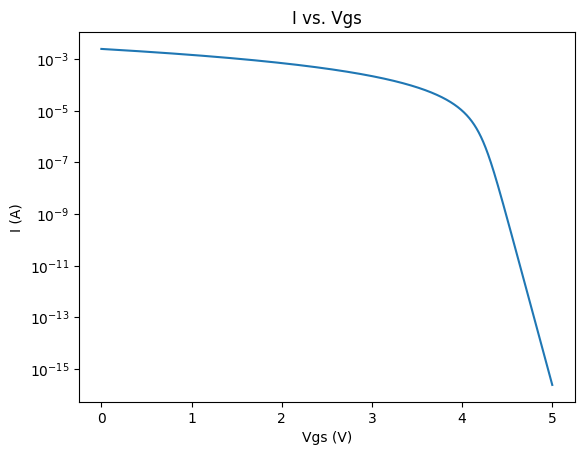

In [90]:
Vb = 5 * units.V
Vg = np.linspace(0 * units.V, 5 * units.V, int(10e3))
Vs = 5 * units.V
Vd = 0 * units.V

I = ekv_model_pmos(Vg, Vd, Vs, Vb)

plt.semilogy(Vg, I)
plt.xlabel("Vgs (V)")
plt.ylabel("I (A)")
plt.title("I vs. Vgs")

Text(0.5, 1.0, 'I vs. Vds')

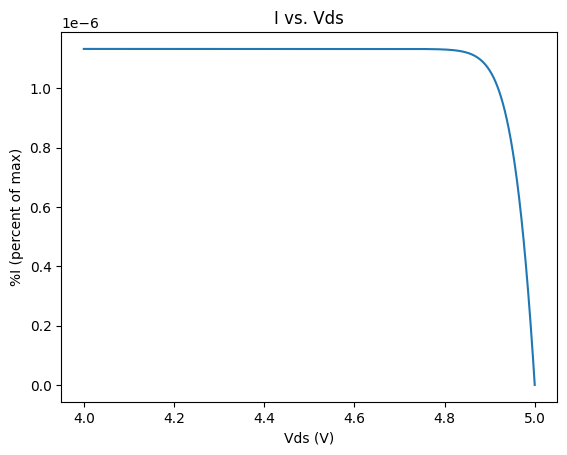

In [91]:
Vb = 5 * units.V
Vg = 4.2 * units.V
Vs = 5 * units.V
Vd = np.linspace(4 * units.V, 5 * units.V, int(10e3))

I = ekv_model_pmos(Vg, Vd, Vs, Vb)
max_I = max(I)
percent_I = I / max_I * 100

plt.plot(Vd, I)
plt.xlabel("Vds (V)")
plt.ylabel("%I (percent of max)")
plt.title("I vs. Vds")